# Statistics and Probability
## Basic statistics

### The *variance* of an array of values is the average square distance of its values from the mean.

In [2]:
def variance(arr):
    from numpy import mean
    arr_avg = mean(arr)
    variances = (arr-arr_avg)**2
    return mean(variances)

### The *standard deviation* of an array of values is the square root of its variance. 
The advantage of the standard deviation is that it shares the same unit of measure of the values from which it is calculated (while the variance squares the unit of measure).

In [3]:
def st_dev(arr):
    from math import sqrt
    from numpy import mean
    arr_avg = mean(arr)
    variances = (arr-arr_avg)**2
    return sqrt(mean(variances))

#### In general, a larger standard deviation indicates that the distribution of values is more spread out. 
It should be noted that as we take a random sample from a population, the st. dev. of the sample will tend to be smaller than that of the population. This is due to the fact that the sample will tend to have a smaller spread than the population itself. To correct for this, we can decrease the denominator within the st. dev. formula, i.e.:

In [4]:
def st_dev(arr,ddof=0): # The ddof value corrects for the lower st.dev. of the sample. Ddof == 0 is the population st. dev.
    from math import sqrt
    from numpy import mean
    arr_avg = mean(arr)
    variances = (arr-arr_avg)**2
    return sqrt(sum(variances)/(len(arr)-ddof)) 

### The standard deviation can be used to judge whether a value is notably divergent from the average or not. 
To do so we can describe a value in terms of how many standard deviations away from the average it is. This special distance is called the *z-score*.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# For this example a dataset of housing sale prices will be used
houses = pd.read_table('datasets/AmesHousing_1.txt')
maxprice = max(houses["SalePrice"])
minprice = min(houses["SalePrice"])

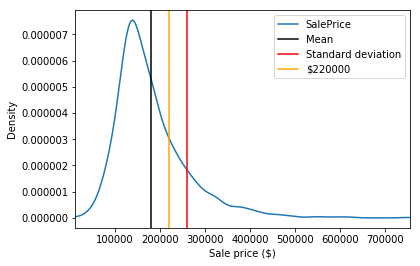

In [9]:
# Visualize the distribution of the SalePrice variable and check whether $220k is unusual or not.
fig, ax = plt.subplots()
houses["SalePrice"].plot.kde(ax=ax,xlim=(minprice,maxprice))
f2 = ax.axvline(np.mean(houses["SalePrice"]),label = "Mean",color="k")
f3 = ax.axvline(np.std(houses["SalePrice"])+np.mean(houses["SalePrice"]),label = "Standard deviation",color="r")
f4 = ax.axvline(220000,color = "orange",label="$220000")
ax.set_xlabel("Sale price ($)")
plt.legend()
# $220k is within the standard deviation and is thus not notably divergent from the average.

In [10]:
# The distance of the value from the average can be divided by the standard deviation: this is called the z-score.
# The z-score effectively describes how many standard deviations away from the mean a certain value is
def z_score(val,arr,ddof=0):
    from numpy import mean, std 
    a_mean = mean(arr)
    a_std = std(arr,ddof=ddof)
    return (val-a_mean)/a_std

For example, one might use z_scores on the housing dataset to find which neighbourhood has its average sale price closest to a set value, e.g. $200k

In [11]:
abs_z_score_200k = {}
for i in houses["Neighborhood"].unique():
    subset = houses.loc[houses["Neighborhood"] == i, "SalePrice"] # Select neighbourhood subset
    abs_z_score_200k[i] = abs(z_score(200000,subset.tolist(),ddof=1))
best_investment_shortform = min(abs_z_score_200k,key=abs_z_score_200k.get) # Get dictionary key corresponding to minimum value
best_investment_shortform

C:\Users\jacop\Anaconda3\lib\site-packages\numpy\core\_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\jacop\Anaconda3\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


'CollgCr'

The neighbourhood for which 200k is the closest to average is CollgCr - that is, College Creek.

#### Entire distributions can be converted to z-scores. This makes the comparison between different distributions easier.
A distribution rescaled to its z-scores is said to be *standardized*.

In [12]:
def standardize(arr,ddof=0):
    from numpy import mean, std 
    a_mean = mean(arr)
    a_std = std(arr,ddof=ddof)
    return (arr-a_mean)/a_std

Standardized distributions can also be easily rescaled. e.g. to improve their readability:

In [13]:
def z_rescale(arr,mu,sigma):
    return arr*sigma + mu
# Where mu and sigma are respectively the mean and the standard deviation of the new distribution.

## Probability distributions
### Binomial distribution

The number of combinations in which an outcome can occur k times in a set of N events can be calculated with the formula: N!/(k!(N-k)!), where ! indicates the *factorial*.

In [14]:
def combinations(k,N):
    from math import factorial
    return factorial(N)/(factorial(k)*factorial(N-k))

If p is the probability of the individual outcome k, we can also find the probability of each combination using the following formula:

In [15]:
def combo_prob(p,k,N):
    # p is the probability of the desired outcome.
    # k is the number of desired occurrences. 
    # N is the number of events.
    return p**k*(1-p)**(N-k)

To provide an example, the following steps use a dataset about bikesharing to calculate how likely it is for more than 5000 bikes to be used for each given day:

In [16]:
import pandas as pd
import numpy as np
bikes = pd.read_csv("datasets/bike_rental_day.csv")
total_days = bikes.shape[0] # The total amount of days for which we have data
over_5000 = bikes[bikes["cnt"]>5000].shape[0] # The total amount of days that had more than 5000 bikes being used
p = over_5000/total_days # Average probability for any given day to have more than 5000 bikes being used

In [17]:
# Now the likelihood for a certain number of days a month to have more than 5000 bikers can be calculated
N = 30
# Each item in this list represents one k, starting from 0 and going up to and including 30.
outcome_counts = np.linspace(0,N,N+1)
outcome_probs = []
for i in outcome_counts:
    outcome_probs.append(combo_prob(p,i,N)*combinations(i,N))

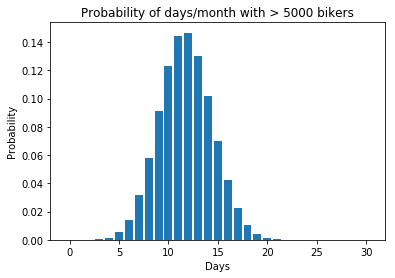

In [18]:
# Visualise the results
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(outcome_counts, outcome_probs)
plt.title("Probability of days/month with > 5000 bikers")
plt.xlabel("Days")
plt.ylabel("Probability")
plt.show()

### Results:
- The most likely number of days is between 10 and 13.

The same results can be replicated by using scipy's binomial distribution method directly.

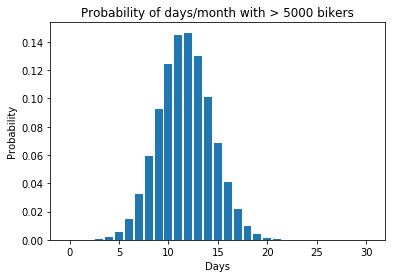

In [19]:
from scipy import linspace
from scipy.stats import binom
# Create a range of numbers from 0 to 30, with 31 elements (each number has one entry).
outcome_counts = np.linspace(0,N,N+1)
outcome_probs = binom.pmf(outcome_counts,30,.39)
plt.bar(outcome_counts,outcome_probs)
plt.title("Probability of days/month with > 5000 bikers")
plt.xlabel("Days")
plt.ylabel("Probability")
plt.show()

The binomial distribution has two important properties regarding mean and standard deviation:
- The mean of a binomial distribution is equal to *p* times *N*.
- The standard deviation of a bionmial distribution is equal to the square root of *N* times *p* times *(1-p)*.

In [20]:
# The binomial distribution has a mean equal to p times N...
dist_mean = N*p
dist_mean

11.737346101231191

In [21]:
# ...and a standard deviation equal to the square root of N times p times (1-p)
from math import sqrt
dist_stdev = sqrt(N*p*(1-p))
dist_stdev

2.6730450148151808

### Cumulative distribution 
A further way to examine probability is through cumulative distributions. These describe how likely it is for k or less outcomes to occur.

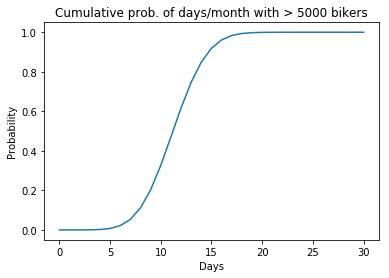

In [22]:
outcome_counts = linspace(0,N,N+1)
cumulative_outcomes = binom.cdf(outcome_counts,N,p) # The binom.cdf method can be used to calculate cumulative distributions
plt.plot(outcome_counts,cumulative_outcomes)
plt.title("Cumulative prob. of days/month with > 5000 bikers")
plt.xlabel("Days")
plt.ylabel("Probability")
plt.show()

## Population differences and significance
### One-tailed and two-tailed permutation tests

Statistics can be used to determine whether differences between two groups are significant or are just likely to be due to chance. A dataset on weight loss will be used to illustrate this concept: between two test groups, one (control) used placebo pills and one (treatment) used the real weight loss pills. Are the pills effective?

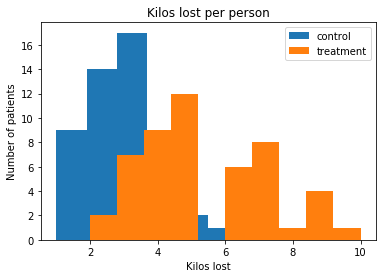

In [23]:
# Read in the data
data = pd.read_csv("datasets/weight_loss.csv",header=None)
# Assign the groups
weight_lost_a = data.loc[:,0]
weight_lost_b = data.loc[:,1]
mean_group_a = np.mean(weight_lost_a)
mean_group_b = np.mean(weight_lost_b)
# Visualize the groups
plt.hist(weight_lost_a,label="control")
plt.hist(weight_lost_b,label="treatment")
plt.legend(loc="upper right")
plt.title("Kilos lost per person")
plt.xlabel("Kilos lost")
plt.ylabel("Number of patients")
plt.show()

To check whether the differences between two groups are significant, a significance tests must be carried out on a specific, chosen metric. The difference between the group means is a common choice.

In [25]:
mean_difference = mean_group_b-mean_group_a
mean_difference

2.52

#### What can now be used is a *permutation test*. 
Significance testing asks whether the difference between two groups is genuine or rather the effect of random chance. To do so, a permutation test evaluates the null hypothesis that the difference between groups really is due to chance: if the test finds that the probability of such hypothesis is smaller than a certain threshold, the hypothesis is rejected and the difference is deemed to be genuine.

To perform a permutation test, all values in the entire set (i.e. from both groups combined) are randomly assigned to two virtual groupings: a new difference between means is then calculated for each pair of virtual groupings. Ideally, the procedure is repeated until all possible group permutations are exhausted - in practice, this is seldom feasible. In most cases the procedure is just repeated for a very large number of times in what is called an approximate permutation test. 

In either case, the end result is a distribution of differences:

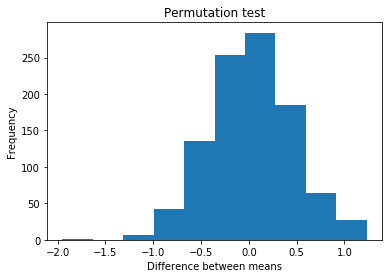

In [26]:
from numpy.random import rand
all_values = data.loc[:,0].append(data.loc[:,1]) # Consolidate all datapoints
mean_differences = [] # Preallocate the list of differences
for i in range(1000): # Generate 1000 virtual groupings
    group_a = []
    group_b = []
    for i in all_values:
        if rand() >= .5: # Use a random number between 0 and 1 to decide where to put the datapoint
            group_a.append(i)
        else:
            group_b.append(i)
    iteration_mean_difference = np.mean(group_b)-np.mean(group_a) # The difference between the means of the virtual groupings
    mean_differences.append(iteration_mean_difference) # Assign the difference to the list
plt.hist(mean_differences)
plt.title("Permutation test")
plt.xlabel("Difference between means")
plt.ylabel("Frequency")
plt.show()

Finally the probability that a randomly generated difference was greater than the empirical difference is calculated. This is known as *p-value*. If the probability is lower than a confidence threshold (commonly set at 5%) the null hypothesis is rejected and the empirical difference deemed to be a real phenomenon.

In [27]:
frequencies = 0
for i in mean_differences:
        if abs(i) >= mean_difference:
            frequencies += 1
p_value = frequencies/1000
p_value

0.0

In this case the p-value is zero so the difference is certainly significant.

Note that what was carried out here is a *one-tailed test*. One-tailed tests are sign-dependent, i.e. they check the likelihood that random differences are either more positive or more negative than an empirical difference depending on the sign of the latter. If what is actually relevant is only the *magnitude* of the difference, then a *two-tailed test* is used. This type of test uses the absolute value of the differences instead.

### Chi-squared test
Another type of significance test is the chi-squared test for categorical data. This test determines the statistical significance of observing a set of categorical values.

Consider a set of 32561 data for which the observed values are 10771 Females, and 21790 Males. The expected values are instead 16280.5 Females and 16280.5 Males. The proportional difference between observed and expected are given by:

In [28]:
female_diff = (10771-16280.5)/16280.5
female_diff

-0.33841098246368356

In [29]:
male_diff = (21790-16280.5)/16280.5
male_diff

0.33841098246368356

This is good, but the numbers will always compensate each other to zero. A non-zero parameter is needed instead. This parameter is the *chi-squared value*:

In [30]:
female_diff = (10771-16280.5)**2/16280.5
male_diff = (21790-16280.5)**2/16280.5
gender_chisq = female_diff+male_diff # The chi-squared value.
gender_chisq

3728.950615767329

The rest is much like the permutation test described earlier. Pairs of random groupings are created and a chi-squared value is calculated for each. Then the likelihood for any of these chi-squared values to be greater than a reference one is calculated and compared against a probability threshold.

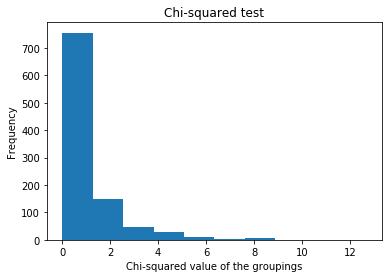

In [31]:
chi_squared_values = []
for i in range(1000):
    vect = rand(32561)
    vect[vect >= .5] = 1
    vect[vect < .5] = 0
    female_count = sum(vect)
    male_count = 32561-female_count
    female_diff = (female_count-16280.5)**2/16280.5
    male_diff = (male_count-16280.5)**2/16280.5
    chi_squared_values.append(female_diff+male_diff)
plt.hist(chi_squared_values)
plt.title("Chi-squared test")
plt.xlabel("Chi-squared value of the groupings")
plt.ylabel("Frequency")
plt.show()

We can quickly assess that the empirical value is much higher than anything that appears in the chi-squared distribution; the p-value will be zero and the difference is significant. An interesting property of chi-values is that they remain the same no matter the size of the sample, as long as the distribution of the data remain proportionally the same between the categories.

Furthermore, chi-squared tests can be performed for any number of categories.

In [32]:
# The scipy.stats.chisquare method can be used to obtain results more easily.
from scipy.stats import chisquare
observed = [27816,3124,1039,311,271]
expected = [26146.5,3939.9,944.3,260.5,1269.8]
diffs = []
race_pvalue = chisquare(observed,expected)[1]
race_pvalue

1.2848494674873035e-232

The difference between observed and expected values is definitely significant.

Finally, the chi-squared test can be carried out over multiple dimensions (i.e. not just along single rows).

In [33]:
# Generate a table with data on US income and demographics:
income = pd.read_csv("datasets/income.csv")
table = pd.crosstab(income["sex"],[income["race"]])
print(table)

race      Amer-Indian-Eskimo   Asian-Pac-Islander   Black   Other   White
sex                                                                      
 Female                  119                  346    1555     109    8642
 Male                    192                  693    1569     162   19174


Most importantly, in a unidimensional chi-squared test expected values are found from other data sets and then compared with the set of observed values. In a multiple category chi-squared test, expected values are calculated across the whole observed values dataset by using per row and per column totals and by finally using the overall total to determine expected proportions. *In brief, a multidimensional chi-squared test offers a complete testing picture just by looking at the observed data.*

In [34]:
# The scipy.stats.chi2_contingency method can be used to generate all the necessary stats, e.g.:
# chisq_value, pvalue, df, expected = chi2_contingency(observed)
from scipy.stats import chi2_contingency
pvalue_gender_race = chi2_contingency(table)[1]
pvalue_gender_race

5.192061302760456e-97

Once again, the difference between observed and expected values is definitely significant.